In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/talking_data.csv")

In [ ]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
df.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [ ]:
df.shape

(100000, 8)

In [ ]:
print(len(df.attributed_time.unique()))

228


In [ ]:
df.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

In [ ]:
df['click_time']=pd.to_datetime(df['click_time'])

In [ ]:
df['attributed_time']=pd.to_datetime(df["attributed_time"])

In [ ]:
df['cdiff']=df.attributed_time-df.click_time

In [ ]:
len(df.cdiff.unique())

185

In [ ]:
df.drop(['attributed_time','cdiff'],axis=1)

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0
...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,0


In [ ]:
df.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
cdiff              99773
dtype: int64

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Correlation between variables: 


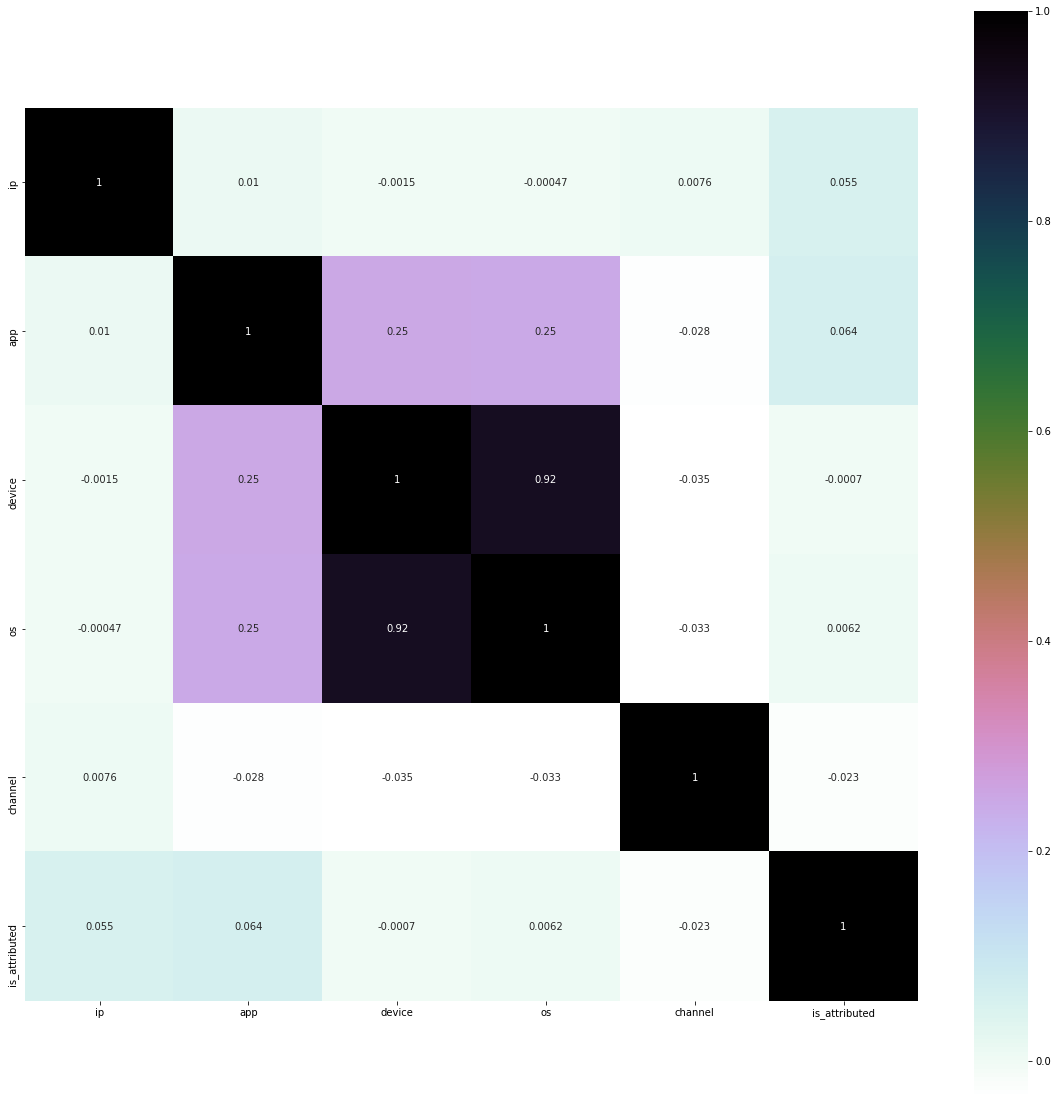

In [ ]:
print("Correlation between variables: ")
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

(array([9.8107e+04, 1.5280e+03, 2.5200e+02, 6.9000e+01, 1.9000e+01,
        9.0000e+00, 4.0000e+00, 6.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([  1.,  56., 111., 166., 221., 276., 331., 386., 441., 496., 551.]),
 <a list of 10 Patch objects>)

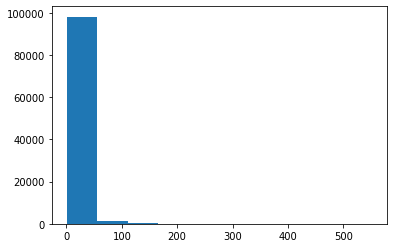

In [ ]:
plt.hist(df['app'])

In [ ]:
df.app.unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261])

<BarContainer object of 100000 artists>

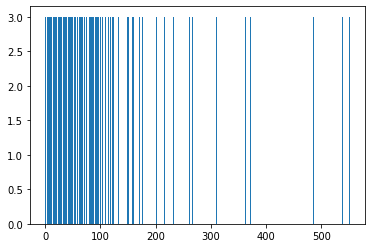

In [ ]:
plt.bar(df.app,height=3)

In [ ]:
df.app.value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64

In [ ]:
df.app.value_counts(normalize=True)

3      0.18279
12     0.13198
2      0.11737
9      0.08992
15     0.08595
        ...   
407    0.00001
145    0.00001
271    0.00001
398    0.00001
92     0.00001
Name: app, Length: 161, dtype: float64

In [ ]:
c=0.03*len(df.app)
mask=df.app.value_counts()>c
print(df.app.value_counts().mask)

<bound method NDFrame.mask of 3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64>


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160]),
 <a list of 161 Text major ticklabel objects>)

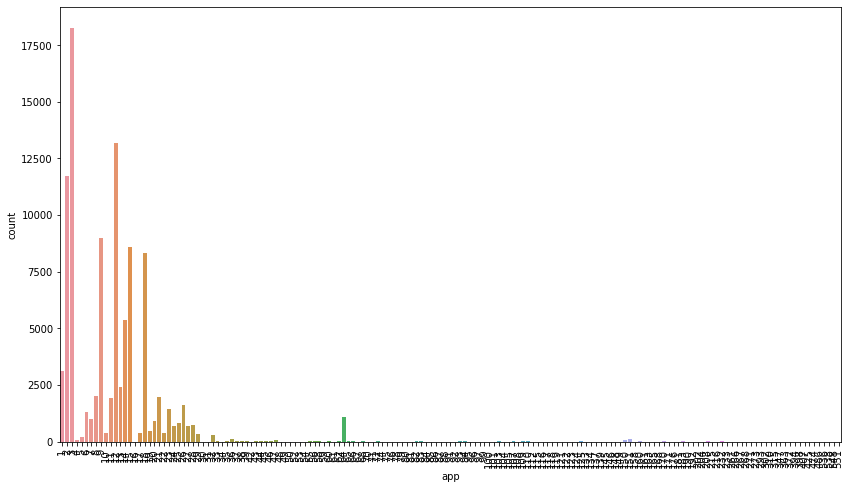

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x="app", data=df)
plt.xticks(rotation=90)

In [ ]:
app_target = df.groupby('app').is_attributed.agg(['mean', 'count'])
app_target

,mean,count
app,,
1,0.000000,3135
2,0.000000,11737
3,0.000219,18279
4,0.000000,58
5,0.074468,188
...,...,...
486,0.000000,1
536,0.000000,1
538,0.000000,1


In [ ]:
frequent_apps = df.groupby('app').size().reset_index(name='count')
frequent_apps = frequent_apps[frequent_apps['count']>frequent_apps['count'].quantile(0.80)]
frequent_apps = frequent_apps.merge(df, on='app', how='inner')
frequent_apps.head()

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed,cdiff
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,NaT,0,NaT
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,NaT,0,NaT
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,NaT,0,NaT
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,NaT,0,NaT
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,NaT,0,NaT


In [ ]:
def timeFeatures(df):
    # Derive new features using the click_time column
    df['datetime'] = pd.to_datetime(df['click_time'])
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df["day_of_year"] = df["datetime"].dt.dayofyear
    df["month"] = df["datetime"].dt.month
    df["hour"] = df["datetime"].dt.hour
    return df

In [ ]:
df = timeFeatures(df)
df.drop(['click_time', 'datetime'], axis=1, inplace=True)
df.head()

,ip,app,device,os,channel,attributed_time,is_attributed,cdiff,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,NaT,0,NaT,1,311,11,9
1,105560,25,1,17,259,NaT,0,NaT,1,311,11,13
2,101424,12,1,19,212,NaT,0,NaT,1,311,11,18
3,94584,13,1,13,477,NaT,0,NaT,1,311,11,4
4,68413,12,1,1,178,NaT,0,NaT,3,313,11,9


In [ ]:
df=df.drop(['cdiff','attributed_time'],axis=1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
X=df.drop(['is_attributed'],axis=1)
y=df[['is_attributed']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 9)
(80000, 1)
(20000, 9)
(20000, 1)


In [ ]:
# check the average download rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

is_attributed    0.002225
dtype: float64
is_attributed    0.00245
dtype: float64


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9979544e-01, 2.0455800e-04],
       [9.9977297e-01, 2.2702734e-04],
       [9.9984288e-01, 1.5712508e-04],
       [9.9947363e-01, 5.2634062e-04],
       [9.9976140e-01, 2.3862203e-04],
       [9.9959868e-01, 4.0131671e-04],
       [9.9981821e-01, 1.8181709e-04],
       [9.9966466e-01, 3.3533608e-04],
       [9.9985653e-01, 1.4347491e-04],
       [9.9976844e-01, 2.3154552e-04]], dtype=float32)

In [ ]:
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 92.82%


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
#hyperparameter tuning creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [ ]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was pas

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.180088,0.017794,0.130296,0.004557,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.965588,0.944641,0.962797,0.957675,0.009287,4,0.989758,0.992759,0.990385,0.990968,0.001293
1,4.562670,0.013572,0.126865,0.002776,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.970768,0.959575,0.969236,0.966526,0.004955,2,0.992686,0.994036,0.993380,0.993368,0.000551
2,3.980287,0.008682,0.125807,0.001233,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.979240,0.953479,0.971188,0.967969,0.010760,1,0.993147,0.993002,0.994702,0.993617,0.000770
3,4.130814,0.014293,0.132494,0.004205,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.963221,0.938792,0.938819,0.946944,0.011509,6,0.997242,0.992901,0.996940,0.995694,0.001979
4,4.594144,0.022954,0.134290,0.001330,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969923,0.943414,0.955018,0.956118,0.010850,5,0.999132,0.999560,0.999344,0.999345,0.000175
5,3.994986,0.019886,0.129743,0.002973,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.981379,0.949833,0.963317,0.964843,0.012924,3,0.998852,0.999414,0.999657,0.999308,0.000337


In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
#cv_results['param_max_depth'] = cv_results['param_max_depth'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.180088,0.017794,0.130296,0.004557,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.965588,0.944641,0.962797,0.957675,0.009287,4,0.989758,0.992759,0.990385,0.990968,0.001293
1,4.562670,0.013572,0.126865,0.002776,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.970768,0.959575,0.969236,0.966526,0.004955,2,0.992686,0.994036,0.993380,0.993368,0.000551
2,3.980287,0.008682,0.125807,0.001233,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.979240,0.953479,0.971188,0.967969,0.010760,1,0.993147,0.993002,0.994702,0.993617,0.000770
3,4.130814,0.014293,0.132494,0.004205,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.963221,0.938792,0.938819,0.946944,0.011509,6,0.997242,0.992901,0.996940,0.995694,0.001979
4,4.594144,0.022954,0.134290,0.001330,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969923,0.943414,0.955018,0.956118,0.010850,5,0.999132,0.999560,0.999344,0.999345,0.000175


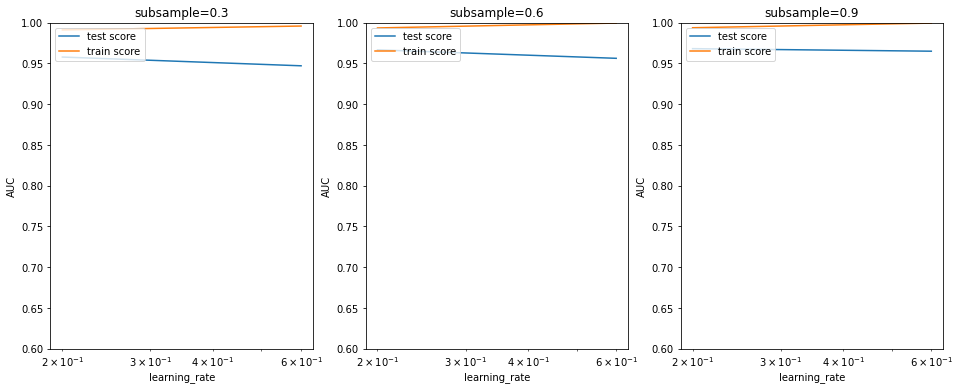

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.9979544e-01, 2.0455800e-04],
       [9.9977297e-01, 2.2702734e-04],
       [9.9984288e-01, 1.5712508e-04],
       [9.9947363e-01, 5.2634062e-04],
       [9.9976140e-01, 2.3862203e-04],
       [9.9959868e-01, 4.0131671e-04],
       [9.9981821e-01, 1.8181709e-04],
       [9.9966466e-01, 3.3533608e-04],
       [9.9985653e-01, 1.4347491e-04],
       [9.9976844e-01, 2.3154552e-04]], dtype=float32)

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.9282026679650859

In [ ]:
# feature importance
importance = dict(zip(X_train.columns, model.feature_importances_))
importance

{'app': 0.2571738,
 'channel': 0.27368823,
 'day_of_week': 0.035369094,
 'day_of_year': 0.0,
 'device': 0.1861723,
 'hour': 0.07260729,
 'ip': 0.11270213,
 'month': 0.0,
 'os': 0.062287085}

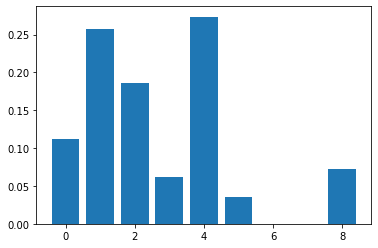

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()